In [1]:
import numpy as np

def bin_form_canon(k, n):
    c=np.zeros((n), dtype=int)
    b=k.digits(2)
    l=len(b)
    c[0:l]=b[0:l]
    return c

In [2]:
def cube_dim_n(n):
    Vertices=vector(ZZ,range(2^n))
    Edges=[]
    for k in Vertices:
        for h in Vertices:
            x=(bin_form_canon(k,n) == bin_form_canon(h,n))
            if np.size(x) - np.count_nonzero(x) == 1:
                Edges.append([k,h])
    return Graph(Edges)

In [3]:
C_4=cube_dim_n(4)

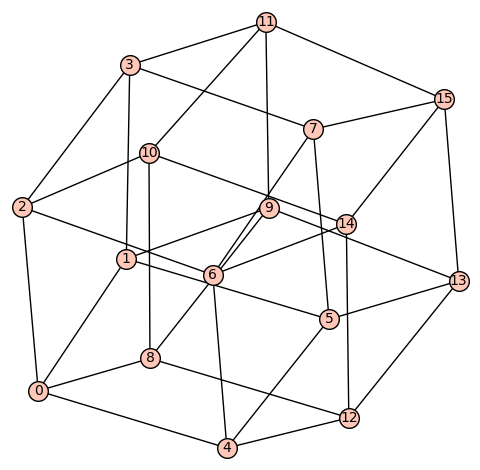

In [4]:
C_4.plot()

In [5]:
def cube_dim_n(n):
    Vertices=vector(ZZ,range(2^n))
    Edges=[]
    for k in Vertices:
        for h in Vertices:
            x=(bin_form_canon(k,n) == bin_form_canon(h,n))
            if np.size(x) - np.count_nonzero(x) == 1:
                Edges.append([k,h])
    return Graph(Edges)

In [6]:
def get_vertex_level(vertex, minimum, dim, orientation):
    if orientation=='bad_times_coh':
        x=bin_form_canon(vertex, dim)
        a=x[0:2]
        b=x[2:dim+1]
        if a[0]==a[1]:
            s1=0
        else:
            s1=1
        s=s1+sum(b)
        return s+minimum
    if orientation=='coherent':
        s=sum(vertex.digits(2))
        return s+minimum

In [9]:
#This is the proof we need
problem=False
for dim in range(2,9):
#We proved the connectedness of the zigzag subgraph up to dimension 9
    for orientation in ['bad_times_coh', 'coherent']:
        for minimum in range(-dim, 1):
            Cube=cube_dim_n(dim)
            Vertices_zigzag=[]
            count_vertices_level_zero=0
            for x in Cube.vertices():
                a=get_vertex_level(Integer(x), minimum, dim, orientation)
                if a in [-1,0,1]:
                    Vertices_zigzag.append(x)
                if a==0:
                    count_vertices_level_zero=count_vertices_level_zero+1
            if count_vertices_level_zero!=0:
                A=Cube.subgraph(Vertices_zigzag)
                if A.is_connected() != True:
                    print('ERRORE', dim, minimum, orientation)
                    problem=True
if problem==False:
    print('Every zigzag subgraph is connected')

Every zigzag subgraph is connected


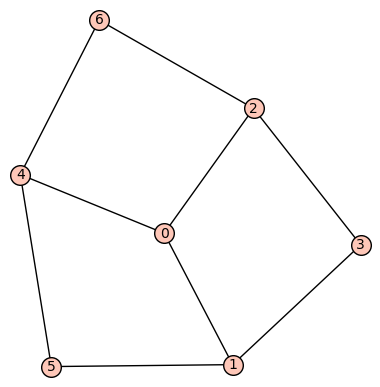

In [11]:
#This is to visualize examples if needed
Vertices_zigzag=[]
dim=3
minimum=-1
orientation='coherent'
Cube=cube_dim_n(dim)
count_level_zero=0
for x in Cube.vertices():
    a=get_vertex_level(Integer(x), minimum, dim, orientation)
    if a in [-1,0,1]:
        Vertices_zigzag.append(x)
    if a==0:
        count_level_zero=count_level_zero+1
if count_level_zero==0:
    print('WARNING: with this configuration the cube does not take value 0. The graph could be disconnected (and it is not a problem).')
A=Cube.subgraph(Vertices_zigzag)
A.plot()